In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def reward_function(th, omega, u):
    target_angle = np.pi
    angle_reward = ((np.cos(th-target_angle)+1.5)**2 - 0.25)
    correctVelocity_reward = -0.00125*(omega)**2
    voltage_penalty = -0.01*(u)**2

    reward = angle_reward + correctVelocity_reward + voltage_penalty
    return reward

In [3]:
size = 61
theta_list = np.linspace(-np.pi, np.pi, size)
omega_list = np.linspace(-60, 60, size)
u_list = np.linspace(-3, 3, size)

theta, omega, u = np.meshgrid(theta_list, omega_list, u_list)
reward = reward_function(theta, omega, u)

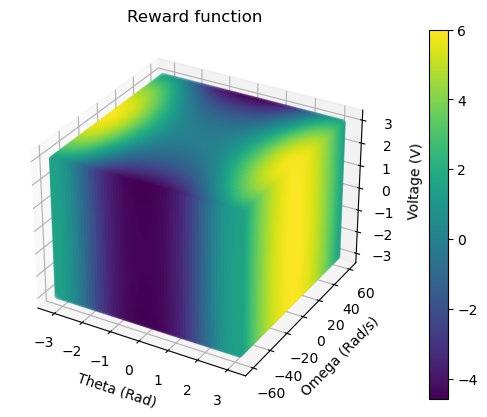

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

data_plot = ax1.scatter(theta, omega, u, c=reward)
fig.colorbar(data_plot, pad=0.1)

# Add title and axis names
plt.title('Reward function')
ax1.set_xlabel('Theta (Rad)')
ax1.set_ylabel('Omega (Rad/s)')
ax1.set_zlabel('Voltage (V)')
plt.show()

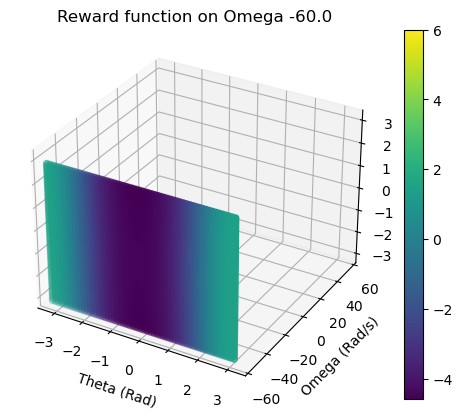

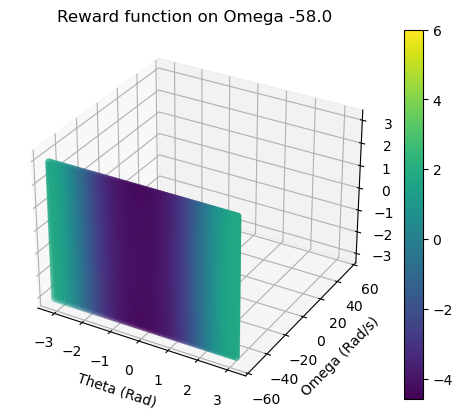

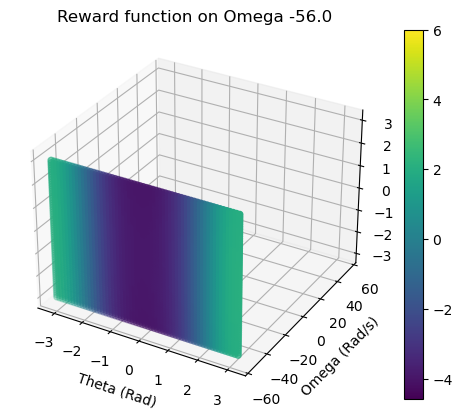

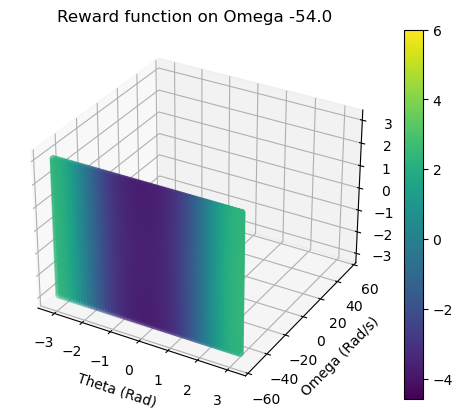

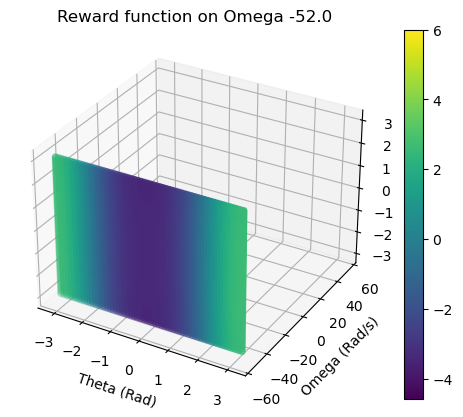

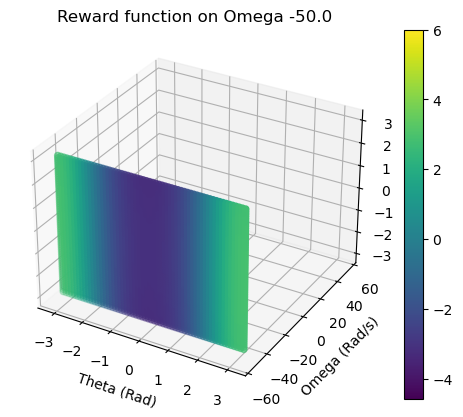

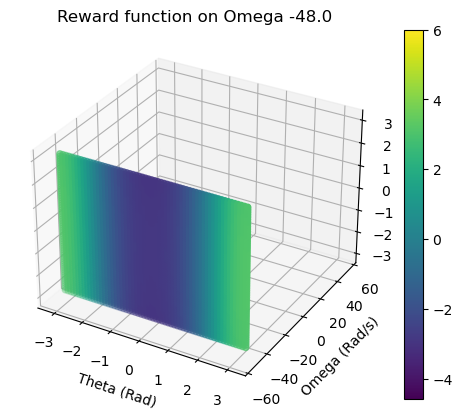

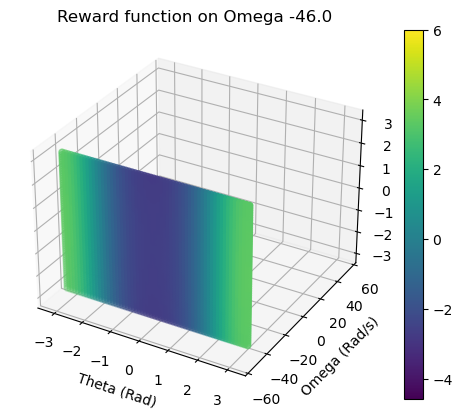

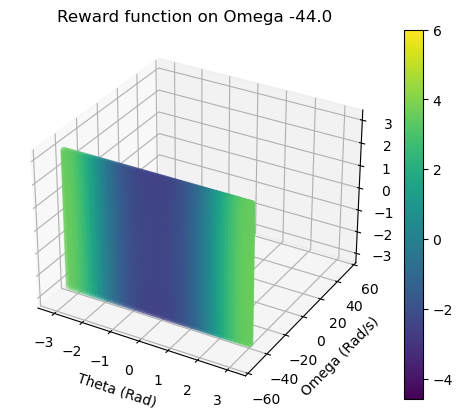

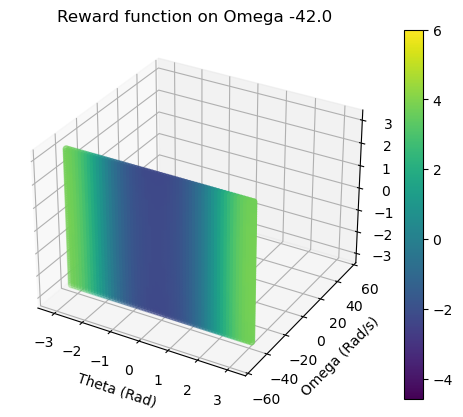

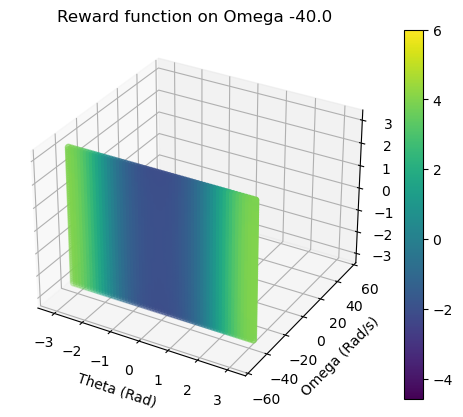

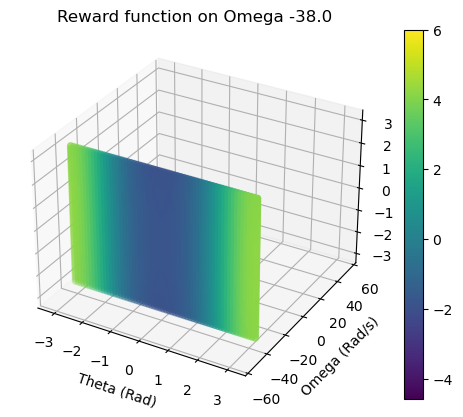

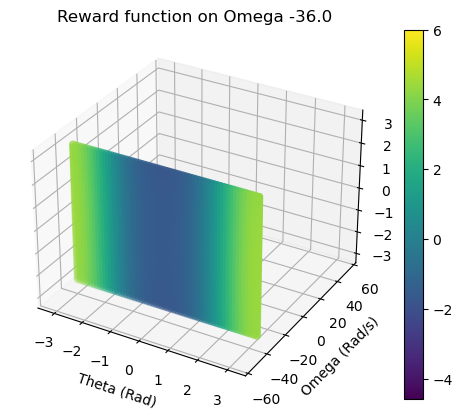

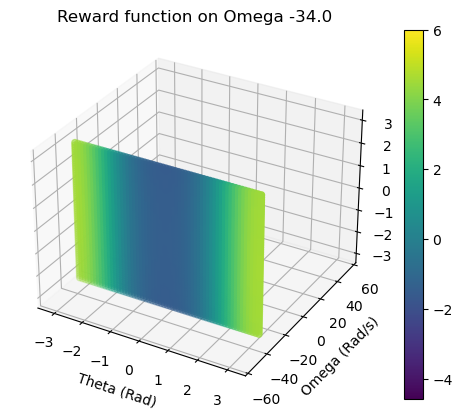

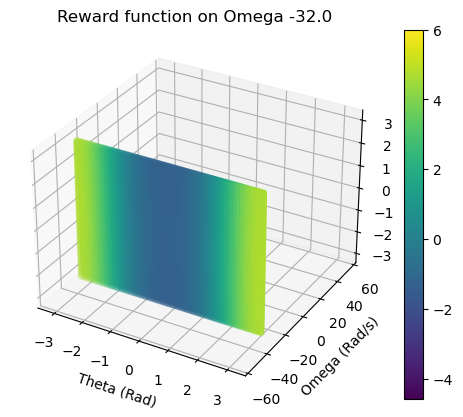

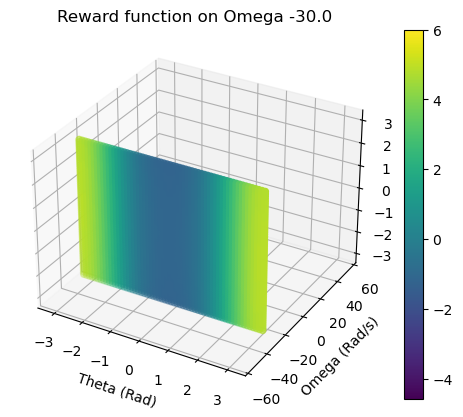

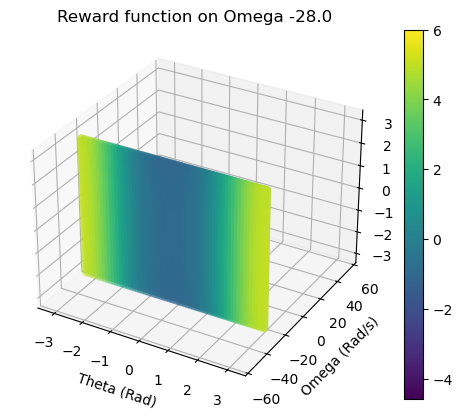

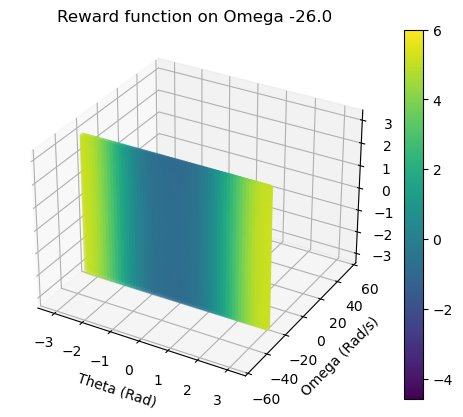

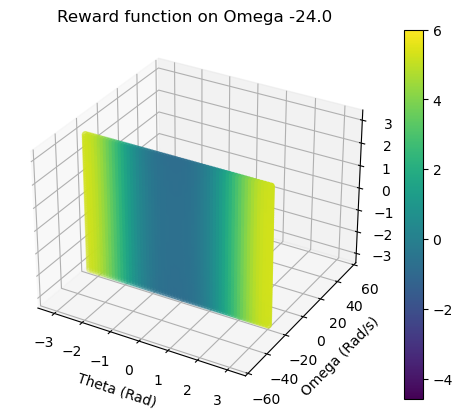

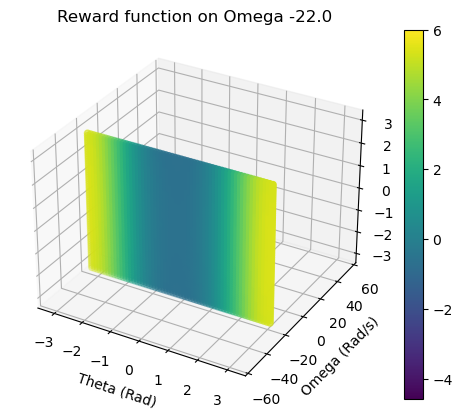

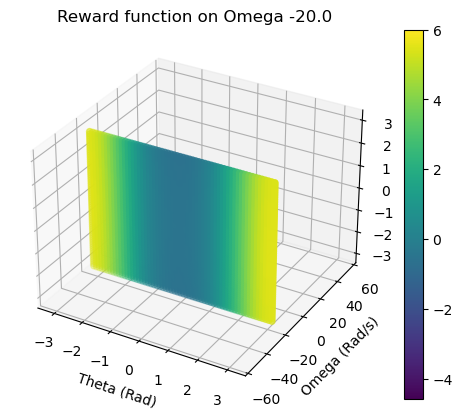

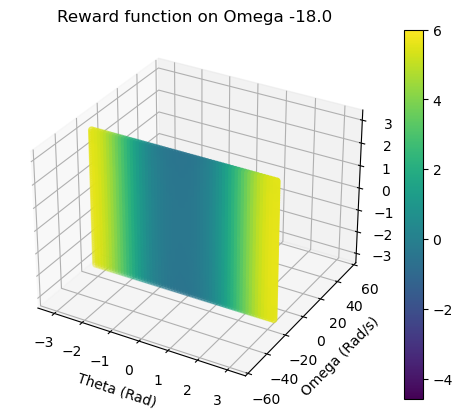

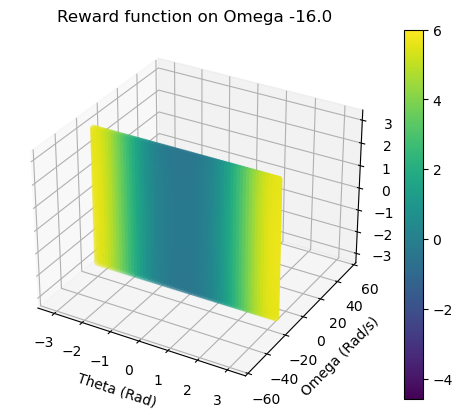

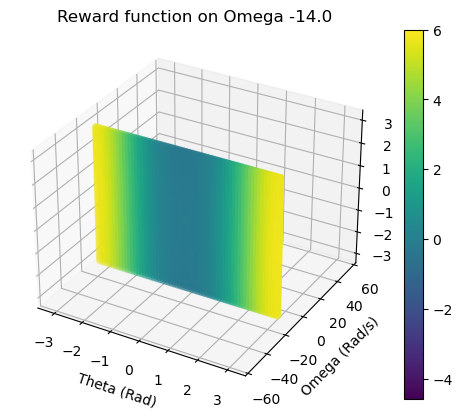

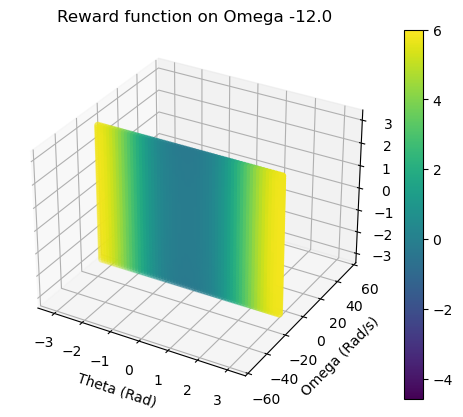

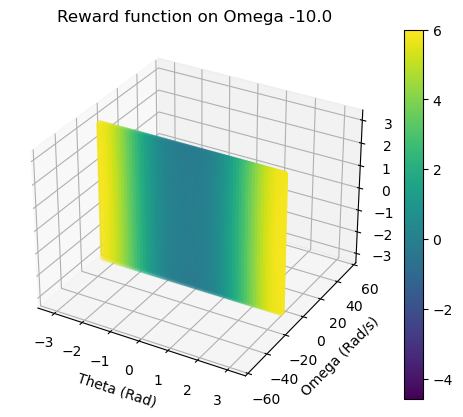

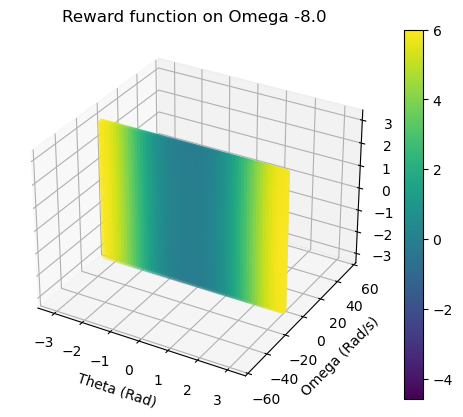

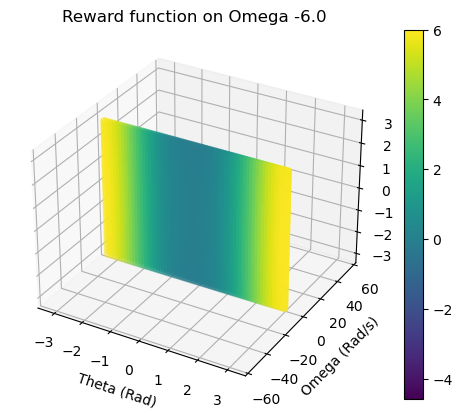

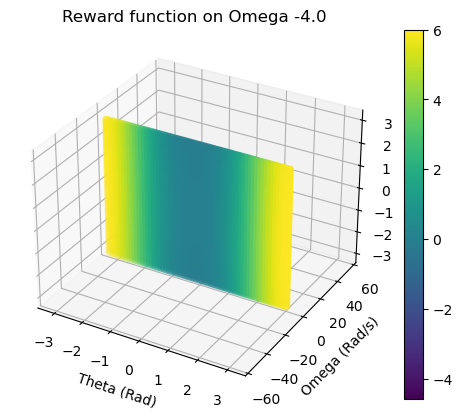

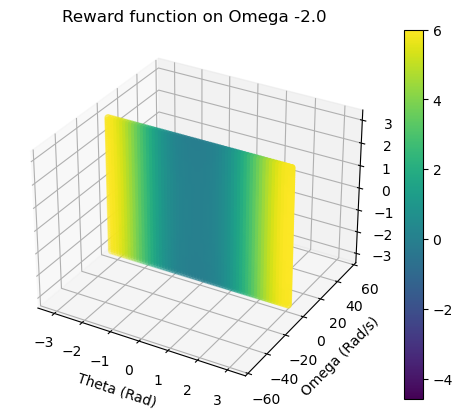

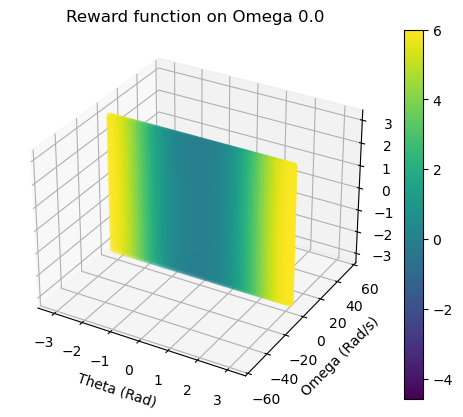

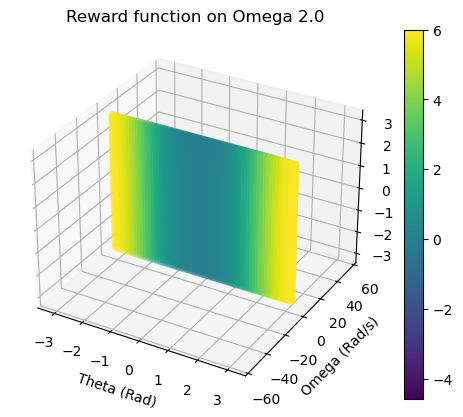

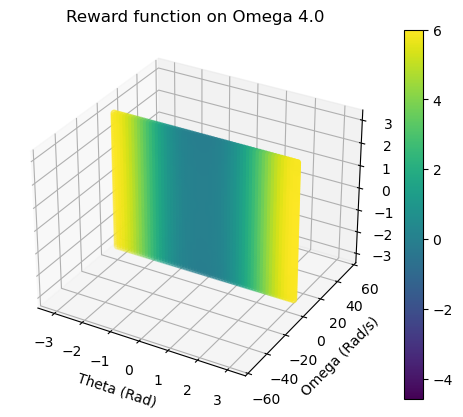

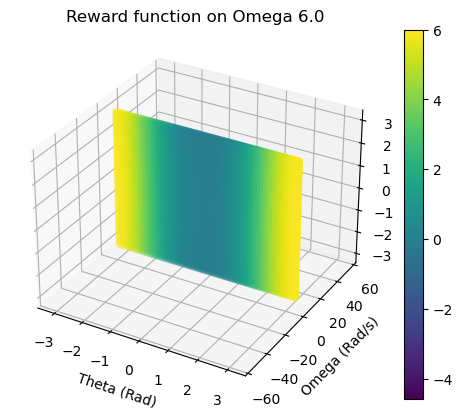

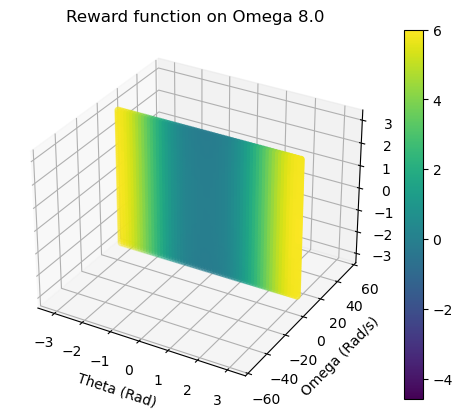

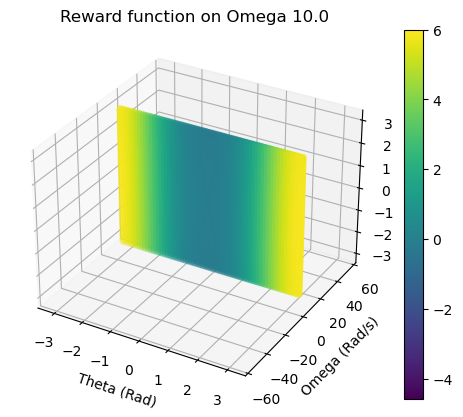

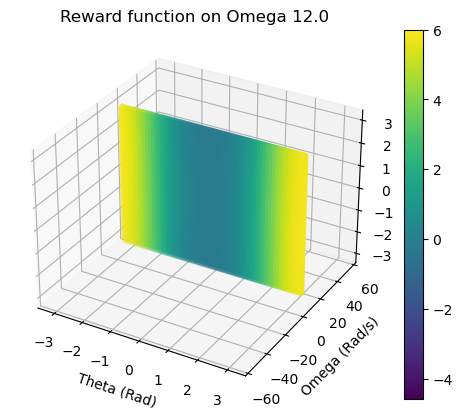

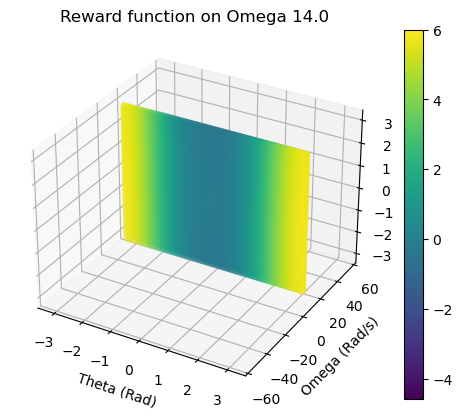

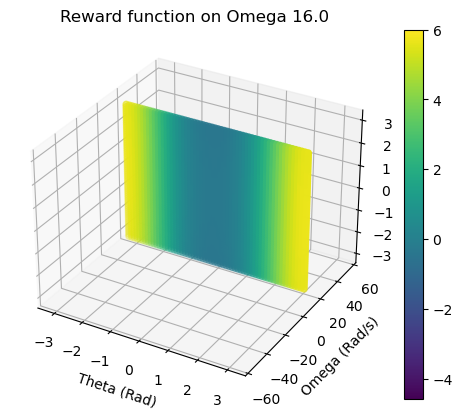

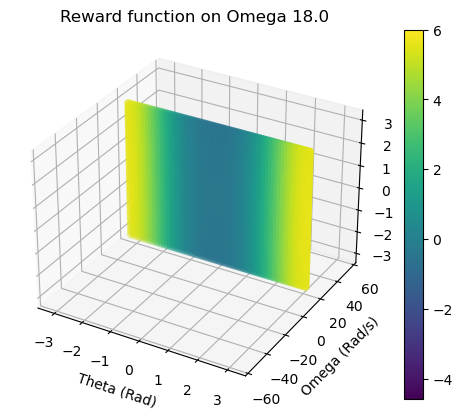

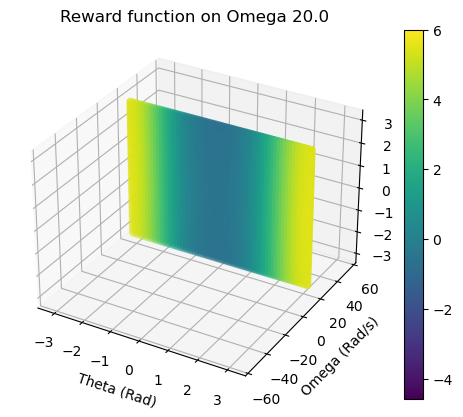

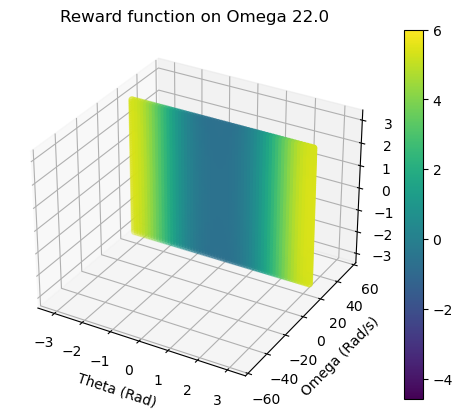

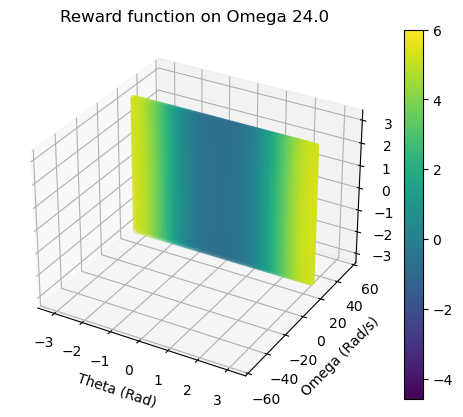

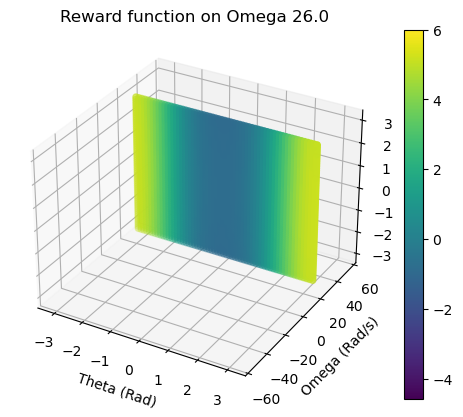

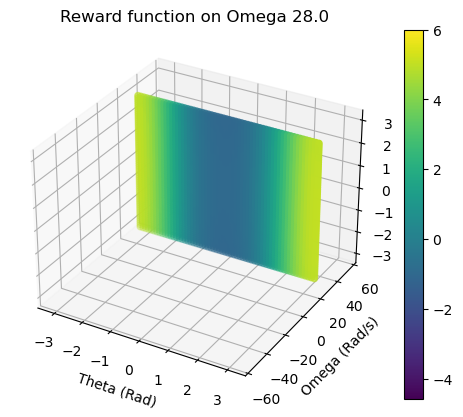

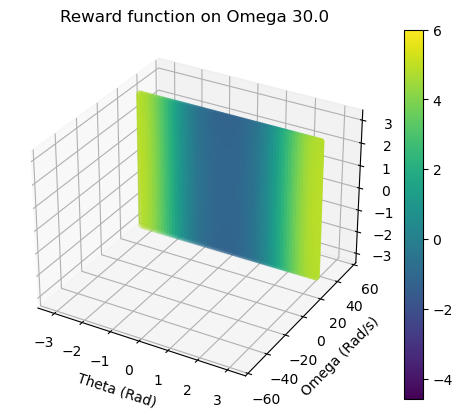

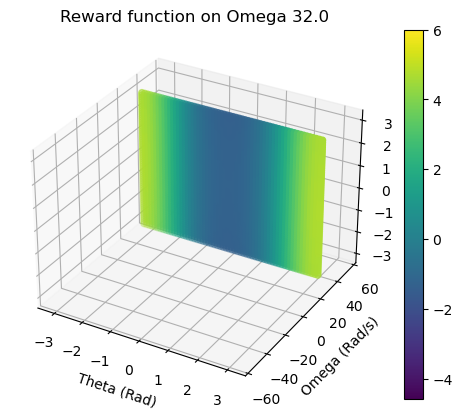

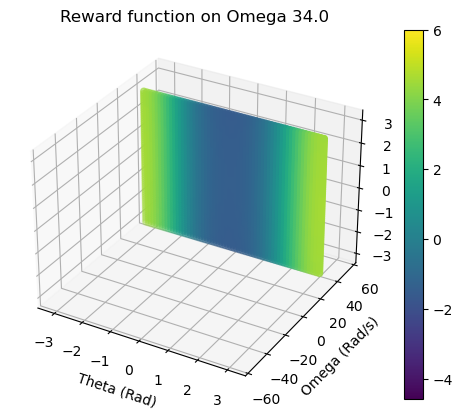

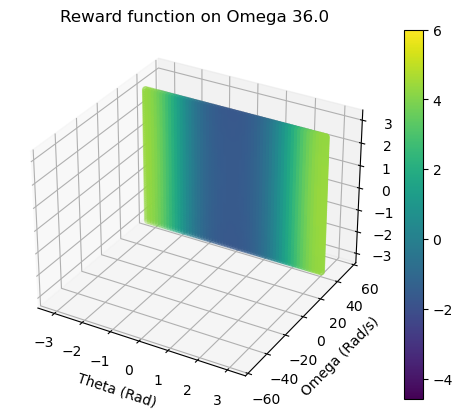

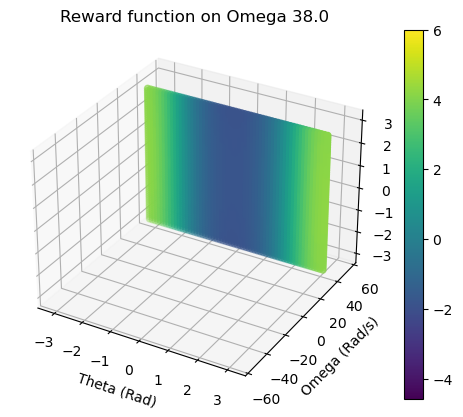

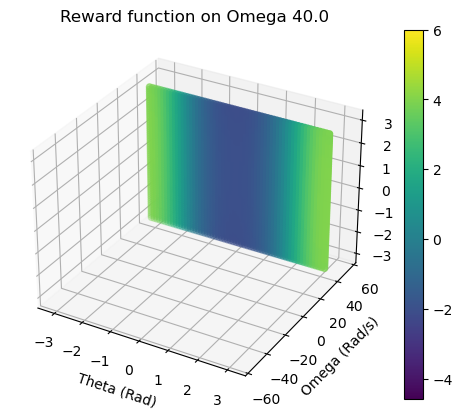

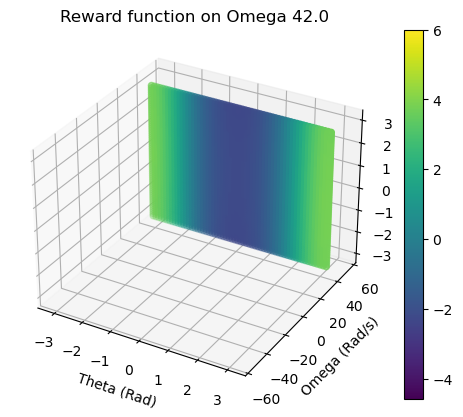

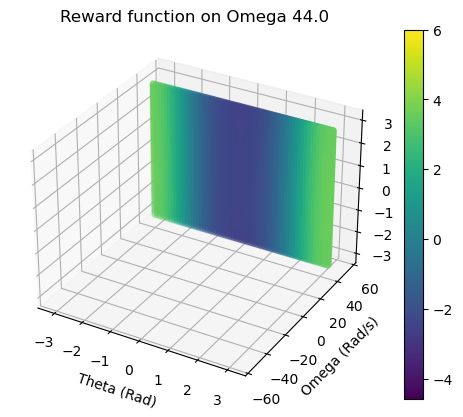

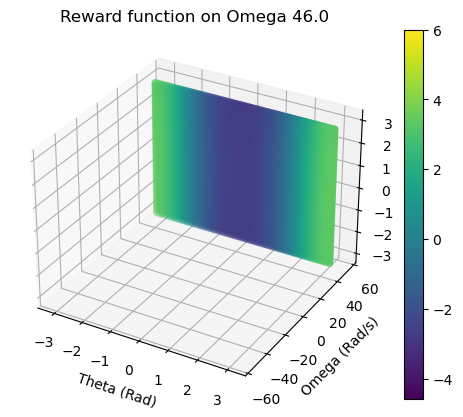

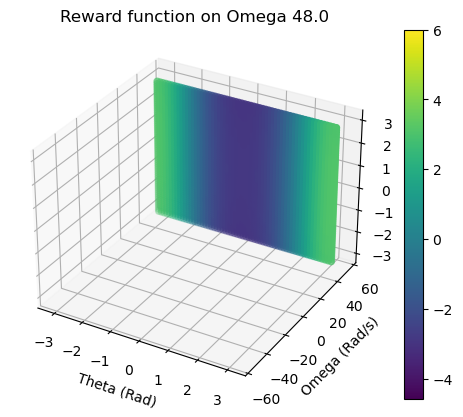

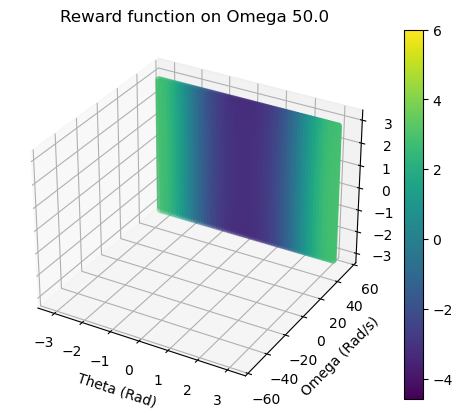

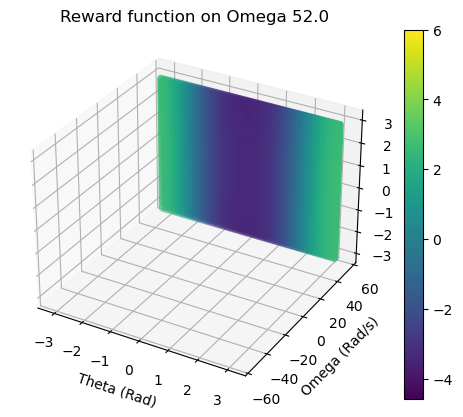

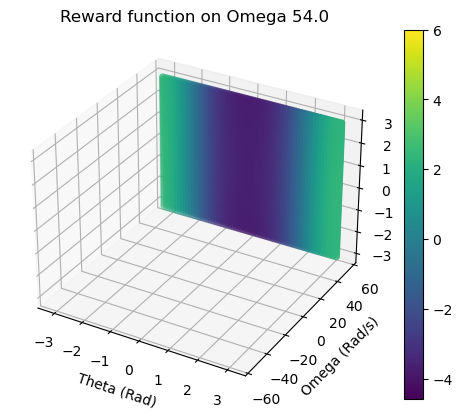

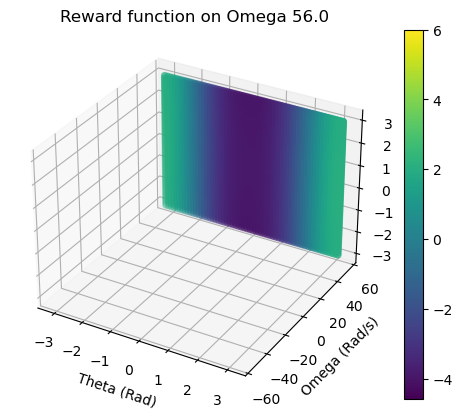

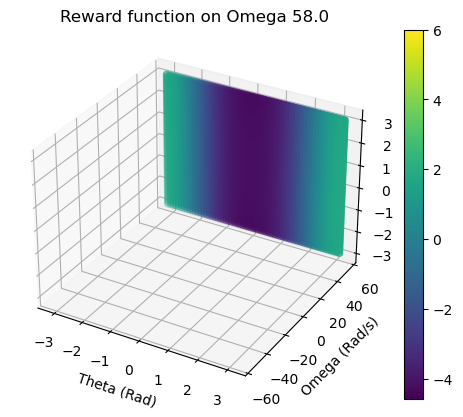

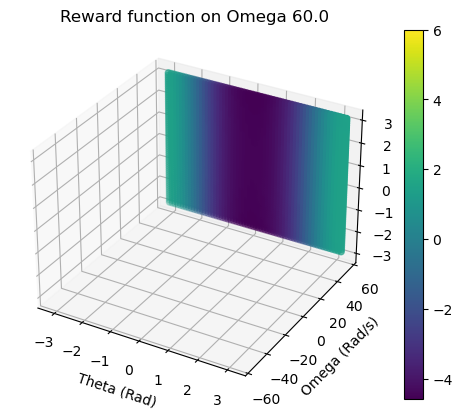

In [5]:
for Index, value in enumerate(omega):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    theta_slice = theta[Index, :, :]
    omega_slice = omega[Index, :, :]
    u_slice = u[Index, :, :]
    reward_slice = reward[Index, :, :]

    data_plot = ax.scatter(theta_slice, omega_slice, u_slice, c=reward_slice, vmin=np.min(reward), vmax=np.max(reward))
    fig.colorbar(data_plot)
    
    plt.title('Reward function on Omega {}'.format(value[Index, Index]))
    ax.set_xlabel('Theta (Rad)')
    ax.set_ylabel('Omega (Rad/s)')
    ax.set_zlabel('Voltage (V)')
    ax.set_ylim(-60, 60)
    plt.show()